# Long-Horizon OPE: MIS vs IS

MIS uses marginalized ratios to stabilize estimates in long horizons. We
compare MIS against IS/PDIS on a longer synthetic MDP.

In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np

from crl.assumptions import AssumptionSet
from crl.assumptions_catalog import MARKOV, OVERLAP, SEQUENTIAL_IGNORABILITY
from crl.benchmarks.mdp_synth import SyntheticMDP, SyntheticMDPConfig
from crl.estimands.policy_value import PolicyValueEstimand
from crl.estimators.importance_sampling import ISEstimator, PDISEstimator
from crl.estimators.mis import MarginalizedImportanceSamplingEstimator
from crl.viz import configure_notebook_display, save_figure
from crl.viz.plots import plot_estimator_comparison

In [2]:
np.random.seed(0)
configure_notebook_display()

benchmark = SyntheticMDP(SyntheticMDPConfig(seed=40, horizon=10))
dataset = benchmark.sample(num_trajectories=300, seed=41)
true_value = benchmark.true_policy_value(benchmark.target_policy)

estimand = PolicyValueEstimand(
    policy=benchmark.target_policy,
    discount=dataset.discount,
    horizon=dataset.horizon,
    assumptions=AssumptionSet([SEQUENTIAL_IGNORABILITY, OVERLAP, MARKOV]),
)

estimators = [
    ISEstimator(estimand),
    PDISEstimator(estimand),
    MarginalizedImportanceSamplingEstimator(estimand),
]

rows = []
for estimator in estimators:
    report = estimator.estimate(dataset)
    rows.append(
        {
            "estimator": report.metadata["estimator"],
            "value": report.value,
            "ci": report.ci,
        }
    )

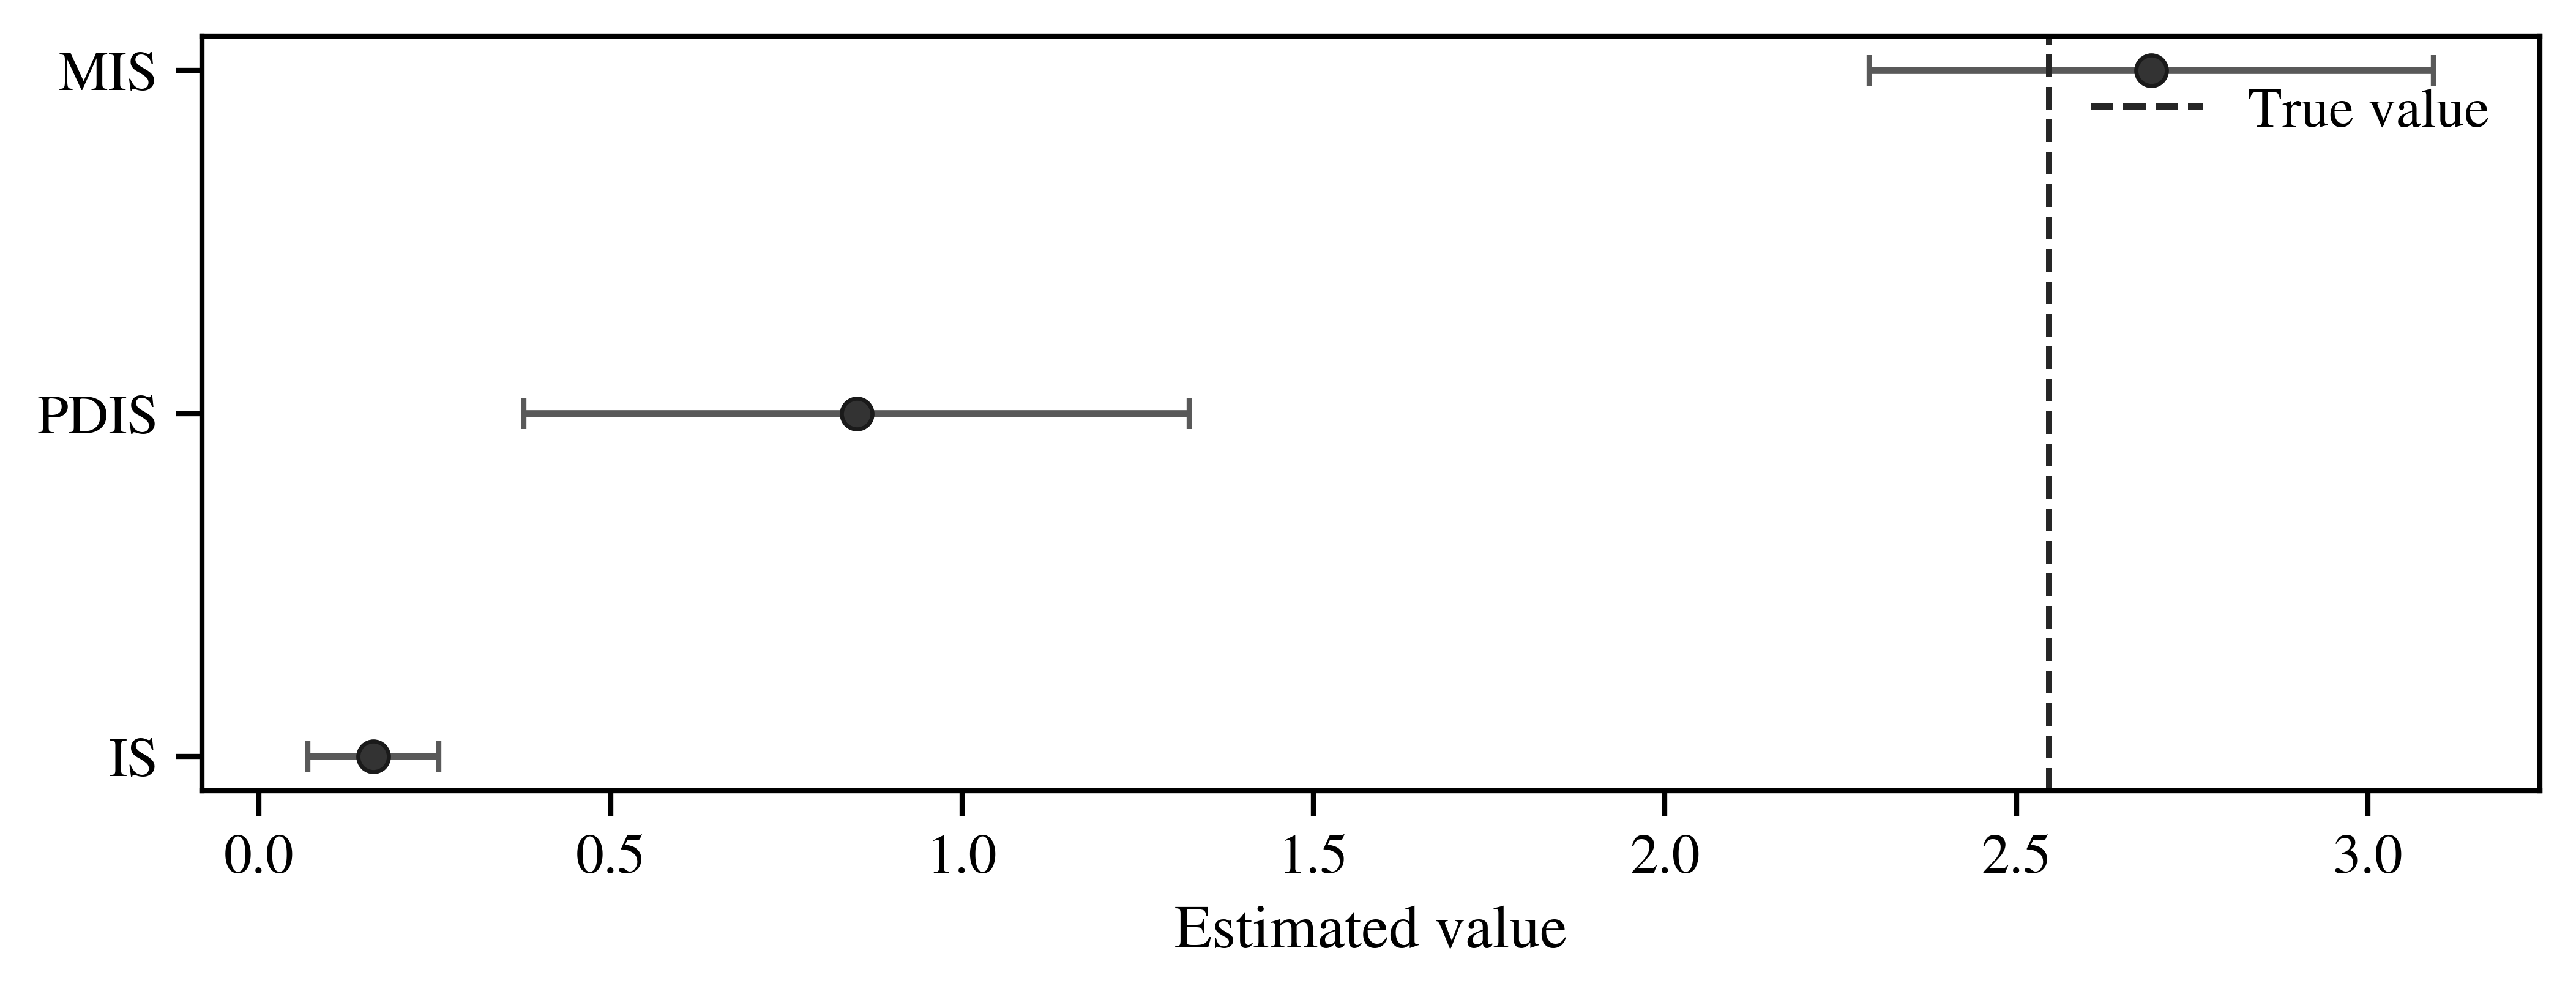

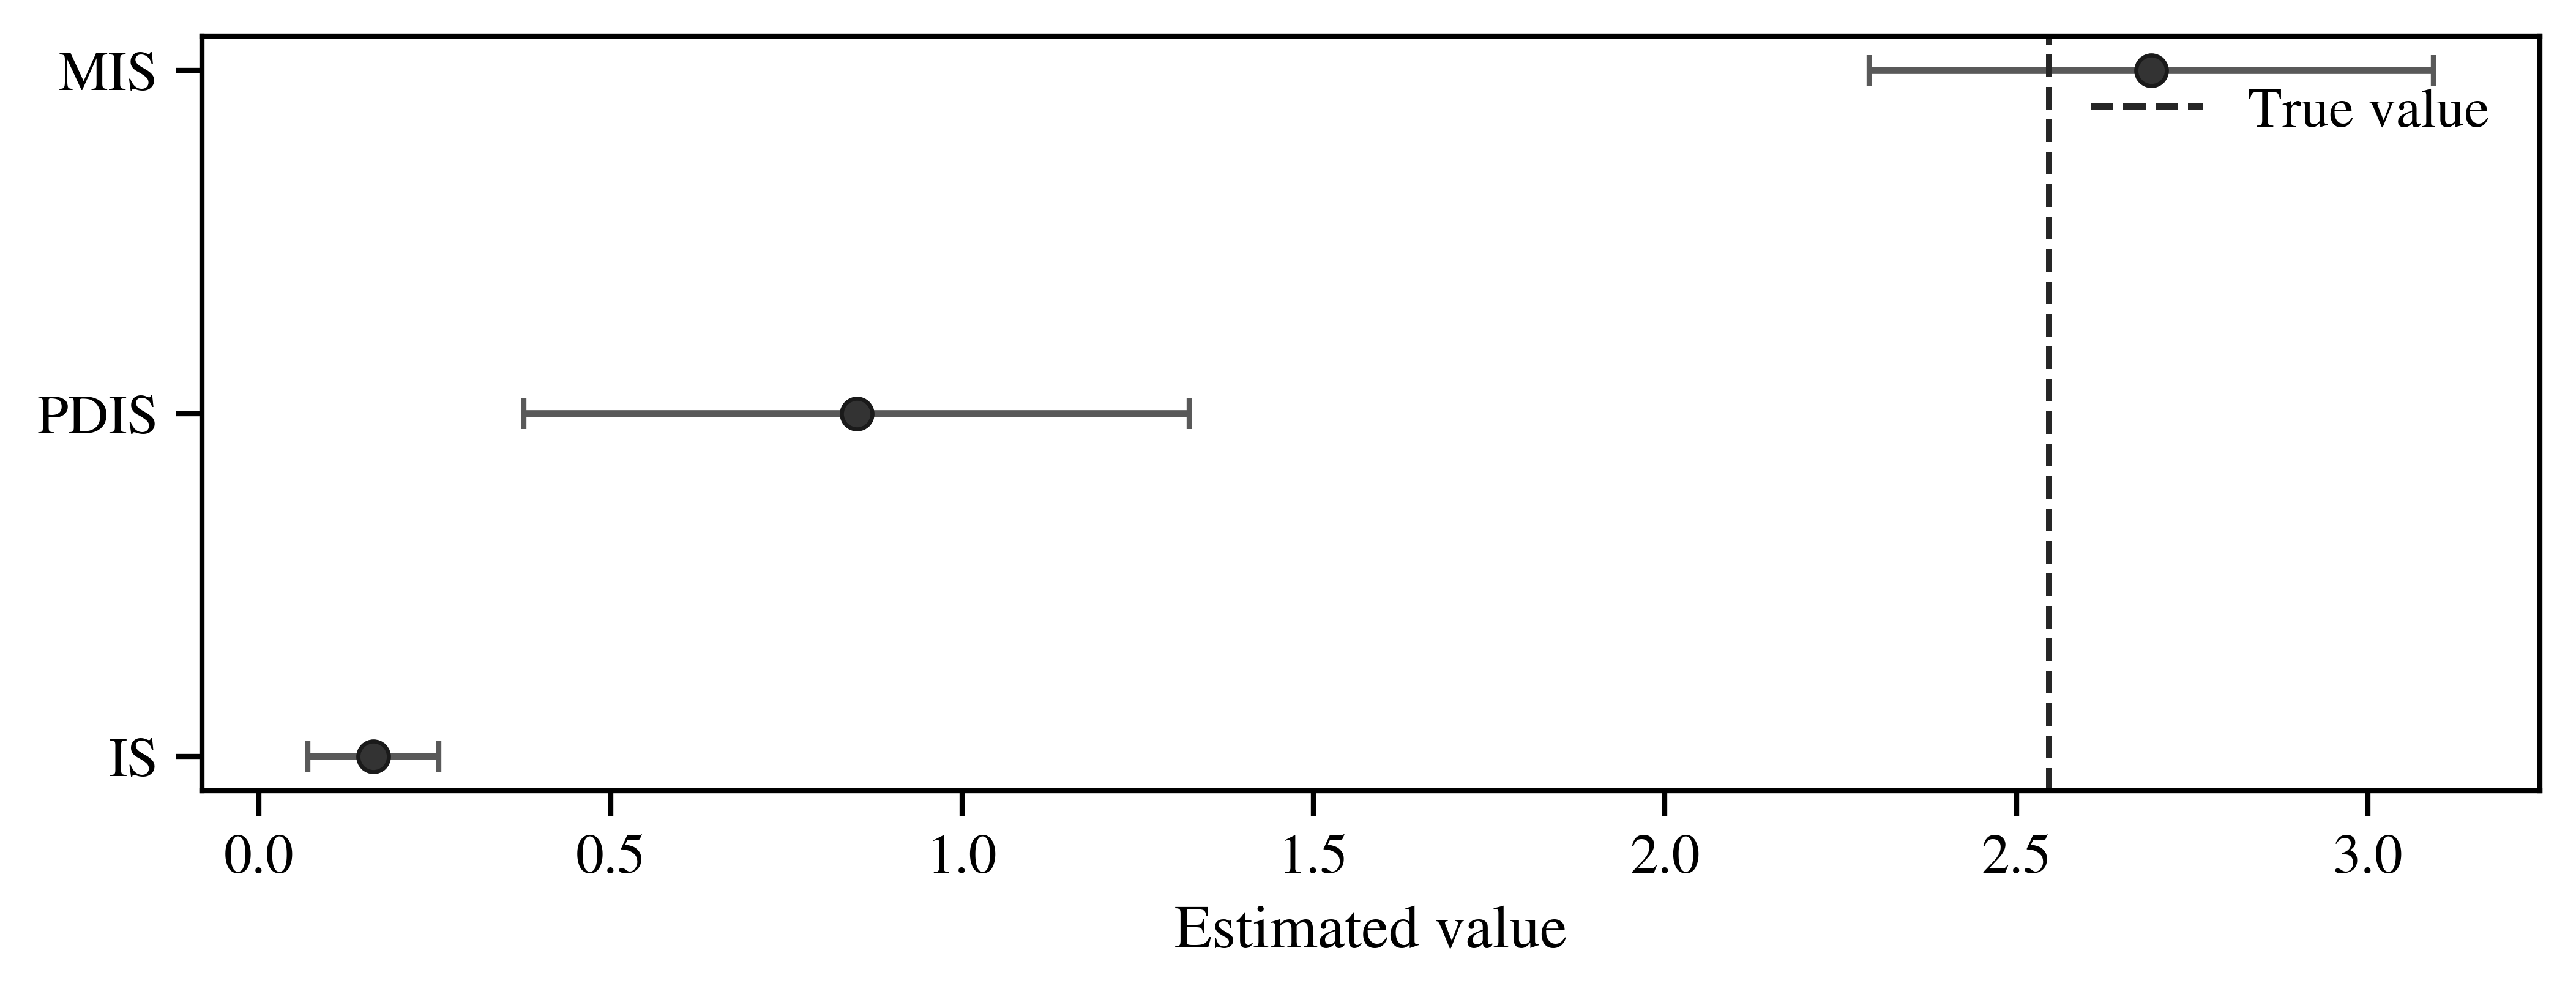

In [3]:
fig = plot_estimator_comparison(rows, truth=true_value)
fig

In [4]:
output_dir = Path("docs/assets/figures")
output_dir.mkdir(parents=True, exist_ok=True)
save_figure(fig, output_dir / "long_horizon_mis_vs_is")

{'pdf': 'docs/assets/figures/long_horizon_mis_vs_is.pdf',
 'png': 'docs/assets/figures/long_horizon_mis_vs_is.png'}